# WeRateDogs 
Wrangling, Analyzing and Visualizing.<br>
**By alaa elhariry** <br><br><br><br>
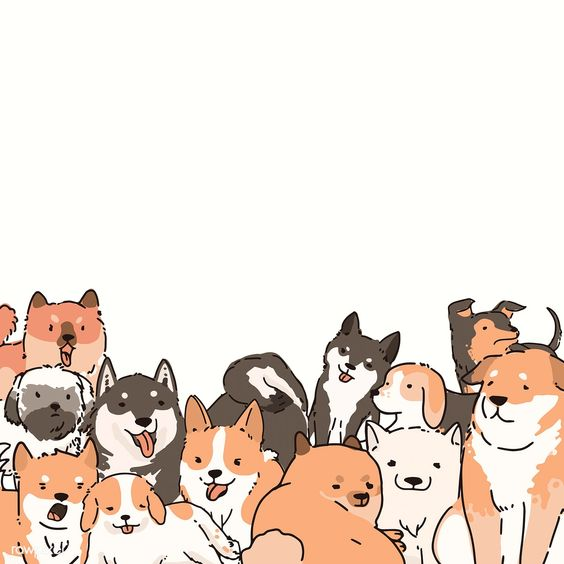
<br><br><br>

## Table of contents 
1. [Introduction](#intro)
2. [Data Wrangling](#wrangle)<br>
    2.1 [Data Gathering](#gather)<br>
    2.1.1 [Twitter archive csv file](#twtarch)<br>
    2.1.2 [tweet image predictions tsv file](#pred)<br>
    2.1.3 [Twitter API & JSON](#json)<br>
    2.1.4 [Gathering Summary](#gath_sum)<br>
    2.2 [Data Assessment](#DA)<br>
    2.2.1 [Visual Assessment](#VA)<br>
    2.2.2 [Programmatic Assessment](#PA)<br>
    2.2.3 [Assessment Summary](#A_sum)<br>
    2.3 [Data Cleaning](#clean)<br>
3. [Data Storing](#store)
4. [Data Analysis and Visualization](#A&V)
5. [Conclusion](#con)
6. [References](#ref) 


<a id='intro'></a>
## 1. Introduction
Real-world data rarely comes clean. Using Python and its libraries, we will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. We will document our wrangling efforts, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.<br><br>
The dataset that we will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog.<br><br>
The purpose and goal of this project is to create a trustworthy and interesting analyses and Visualization based on the wrangled data<br><br><br>

<a id='wrangle'></a>
## 2. Data Wrangling 
Fasten your seat belts ladies and gentlemen, from here the wrangling process begins ^^

<a id='gather'></a>
### 2.1 Data Gathering 
In this first part of the wrangling process we will collect the needed data. Firstly, `Twitter archive csv file`, which has been downloaded manually and can be found in the github repository along with this notebook. Secondly, `The tweet image predictions tsv file`, which we will download programmatically. Finally, `Twitter API & JSON`.

In [29]:
# importing the required libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import matplotlib as plt
import requests 
import json
import tweepy
from IPython.display import HTML, display
import time
import re
from functools import reduce
%matplotlib inline

<a id='twtarch'></a>
<br><br>
### Twitter archive csv file

In [123]:
# reading Twitter archive csv file
twitter_archive= pd.read_csv('twitter-archive-enhanced.csv')

In [124]:
twitter_archive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [125]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

<a id='pred'></a>
<br><br>
### tweet image predictions tsv file

In [5]:
# Downloading programmatically the tweet image predictions tsv file
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response= requests.get(url)
with open('image-predictions.tsv', mode= 'wb') as file:
    file.write(response.content)

In [6]:
# reading tweet image predictions tsv file
tweet_image_predictions= pd.read_csv('image-predictions.tsv', sep='\t')
tweet_image_predictions.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [8]:
tweet_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


<a id='json'></a>
<br><br>
### Twitter API & JSON

In [9]:
# Using the twitter API and python's tweepy library and store each tweet's set of JSON data in a file
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


**source**: https://github.com/tweepy/tweepy/issues/1102

In [11]:
# Downloading Tweepy status object based on the tweet IDs and store it in a list, and the unfound tweets in another list:
unfound_tweets= []
tweets=[]
for tweet_id in twitter_archive['tweet_id']:
    try:
        tweets.append(api.get_status(tweet_id))
    except Exception as e:
        unfound_tweets.append(tweet_id)

In [12]:
print(len(tweets))
print(len(unfound_tweets))

2089
267


In [13]:
# gatheing data for the second time
unfound_tweets_new= []
for tweet_id in unfound_tweets:
    try:
        tweets.append(api.get_status(tweet_id))
    except Exception as e:
        unfound_tweets_new.append(tweet_id)

In [14]:
print(len(tweets))
print(len(unfound_tweets_new))

2331
25


In [15]:
# gatheing data for the third time
unfound_tweets_new2= []
for tweet_id in unfound_tweets_new:
    try:
        tweets.append(api.get_status(tweet_id))
    except Exception as e:
        unfound_tweets_new2.append(tweet_id)

In [16]:
print(len(tweets))
print(len(unfound_tweets_new2))

2331
25


since the numbers are the same as the previous ones, we can stop. There're 25 missing tweets

In [17]:
# Isolating the JSON part of each tweepy status object
JSON_only=[]
for JSON_tweets in tweets:
    JSON_only.append(JSON_tweets)

In [18]:
# Writing JSON_only list into a text file named tweet_json.text
with open('tweet_json.text', 'w') as file:
    file.write(json.dumps(JSON_only, indent=4))

**source**: https://docs.python.org/3/library/json.html

In [21]:
# Extracting the data and store it in a dataframe
Needed_Information=[]
with open('tweet_json.text', encoding= 'utf-8') as JSON_file:
    entire_data= json.load(JSON_file)
    for i in entire_data:
        tweet_ids= i['id']
        Date_Time= i['created_at']
        the_tweet= i['text']
        number_of_likes= i['favorite_count']
        number_of_retweets= i['retweet_count']
        number_of_followers= i['user']['followers_count']
        full_source= i['source']
        the_device= full_source[full_source.find('rel="nofollow">') + 15 :-4]
        numer_of_friends= i['user']['friends_count']
        source= the_device
       
        Needed_Information.append({'Date_Time': str(Date_Time),
                                   'tweet_ids': str(tweet_ids), 
                            'number_of_likes': int(number_of_likes),
                            'number_of_retweets': int(number_of_retweets),
                            'number_of_followers': int(number_of_followers),
                            'numer_of_friends': int(numer_of_friends),
                            'source': source})
        Tweet_JSON= pd.DataFrame(Needed_Information, columns= ['tweet_ids',
                                                        'number_of_likes',
                                                        'number_of_retweets',
                                                        'number_of_followers',
                                                        'numer_of_friends',
                                                        'source',
                                                        'Date_Time'])


Exctrcting all the potentially needed information in case a new question comes up later.<br>
**Resource**: https://docs.python.org/3/howto/unicode.html


In [23]:
Tweet_JSON.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   tweet_ids            2331 non-null   object
 1   number_of_likes      2331 non-null   int64 
 2   number_of_retweets   2331 non-null   int64 
 3   number_of_followers  2331 non-null   int64 
 4   numer_of_friends     2331 non-null   int64 
 5   source               2331 non-null   object
 6   Date_Time            2331 non-null   object
dtypes: int64(4), object(3)
memory usage: 127.6+ KB


In [24]:
Tweet_JSON.head()

,tweet_ids,number_of_likes,number_of_retweets,number_of_followers,numer_of_friends,source,Date_Time
0,892420643555336193,35390,7473,8897909,18,Twitter for iPhone,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,30631,5547,8897909,18,Twitter for iPhone,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,23038,3671,8897910,18,Twitter for iPhone,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,38675,7647,8897910,18,Twitter for iPhone,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,36961,8249,8897910,18,Twitter for iPhone,Sat Jul 29 16:00:24 +0000 2017


In [26]:
# Downloading the dataframe
Tweet_JSON.to_csv(r'Tweet_JSON.csv', index = False)

We downloaded the dataframe as csv file, in case we needed it outstide this notebook.

<a id='gath_sum'></a>
### 2.1.4 Gathering Summary
We reached the end of the first step in the data wrangling process. We succeeded at gathering data from different sources and in different formats. And till here we are done with gathring step; unless something comes up later.  

<a id='DA'></a>
### 2.2 Data Assessment 
After gathering the required pieces of data, we are going to assess them visually and programmatically for quality and tidiness issues.

<a id='VA'></a>
#### 2.2.1 Visual Assessment
The gathered data will be displayed for the solely purpose of visual assessment and getting acquainted with the dataset.

In [63]:
# Getting an overview of the dataset
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [30]:
# Getting an overview of the dataset
tweet_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [31]:
# Getting an overview of the dataset
Tweet_JSON

,tweet_ids,number_of_likes,number_of_retweets,number_of_followers,numer_of_friends,source,Date_Time
0,892420643555336193,35390,7473,8897909,18,Twitter for iPhone,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,30631,5547,8897909,18,Twitter for iPhone,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,23038,3671,8897910,18,Twitter for iPhone,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,38675,7647,8897910,18,Twitter for iPhone,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,36961,8249,8897910,18,Twitter for iPhone,Sat Jul 29 16:00:24 +0000 2017
...,...,...,...,...,...,...,...
2326,673576835670777856,1307,525,8897963,18,Twitter for iPhone,Sun Dec 06 18:56:46 +0000 2015
2327,673363615379013632,969,283,8898613,18,Twitter for iPhone,Sun Dec 06 04:49:31 +0000 2015
2328,673359818736984064,1361,628,8897963,18,Twitter for iPhone,Sun Dec 06 04:34:25 +0000 2015
2329,673355879178194945,1415,534,8897963,18,Twitter for iPhone,Sun Dec 06 04:18:46 +0000 2015


<a id='PA'></a>
#### 2.2.2 Programmatic Assessment
Here, we are going to use some methods that are used for assessing the data, along with some of Pandas' functions in order to find any quality or tidiness issues.

##### twitter_archive

In [106]:
# Looking at a randome sample from the dataset
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1976,672995267319328768,NaN,NaN,2015-12-05 04:25:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pumpkin. He can look in two different directions at once. Great with a screwdriver. 8/10 https://t.co/odpuqtz2Fq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672995267319328768/photo/1,8,10,Pumpkin,None,None,None,None
2011,672245253877968896,NaN,NaN,2015-12-03 02:45:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Snickers. He's adorable. Also comes in t-shirt mode. 12/10 I would aggressively caress Snickers https://t.co/aCRKDaFmVr,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672245253877968896/photo/1,12,10,Snickers,None,None,None,None
495,813172488309972993,NaN,NaN,2016-12-26 00:00:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Eleanor. She winks like she knows many things that you don't. 12/10 https://t.co/bxGwkJa2kE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813172488309972993/photo/1,12,10,Eleanor,None,None,None,None
1554,688898160958271489,NaN,NaN,2016-01-18 01:38:15 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you have a ton of work to do but then remember you have tomorrow off. 10/10 https://t.co/MfEaMUFYTx,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/688898160958271489/photo/1,https://twitter.com/dog_rates/status/688898160958271489/photo/1",10,10,None,None,None,None,None
1514,691090071332753408,NaN,NaN,2016-01-24 02:48:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's a dog in a mailbox. 12/10 https://t.co/MM7tb4HpEY,NaN,NaN,NaN,https://twitter.com/dog_rates/status/691090071332753408/photo/1,12,10,None,None,None,None,None
1597,686050296934563840,NaN,NaN,2016-01-10 05:01:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Flávio. He's a Macedonian Poppycock. 97% floof. Jubilant af. 11/10 personally I'd pet the hell out of https://t.co/BUyX7isHRg,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686050296934563840/photo/1,11,10,Flávio,None,None,None,None
492,813217897535406080,NaN,NaN,2016-12-26 03:00:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is Atlas. He went all out this year. 13/10 downright magical af https://t.co/DVYIZOnO81,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/813217897535406080/photo/1,https://twitter.com/dog_rates/status/813217897535406080/photo/1,https://twitter.com/dog_rates/status/813217897535406080/photo/1,http...",13,10,Atlas,None,None,None,None
1877,675109292475830276,NaN,NaN,2015-12-11 00:26:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",C'mon guys. We've been over this. We only rate dogs. This is a cow. Please only submit dogs. Thank you...... 9/10 https://t.co/WjcELNEqN2,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675109292475830276/photo/1,9,10,a,None,None,None,None
974,750056684286914561,NaN,NaN,2016-07-04 20:00:23 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Jameson. He had a few too many in the name of freedom. I can't not respect that. 11/10 'Merica https://t.co/8zQvXM6pG5,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750056684286914561/photo/1,11,10,Jameson,None,None,None,None
1747,679111216690831360,NaN,NaN,2015-12-22 01:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is officially the greatest yawn of all time. 12/10 https://t.co/4R0Cc0sLVE,NaN,NaN,NaN,https://twitter.com

In [32]:
# Getting an information about the dataset
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [33]:
# Checking if there's any id duplications
sum(twitter_archive['tweet_id'].duplicated())

0

In [34]:
# Getting the sum of the null values in each column
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [35]:
# Getting the number of unique values in each column
twitter_archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [36]:
# Getting the count of each unique rating_numerator value 
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [37]:
# Getting the count of each unique rating_denominator value 
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [38]:
# Getting the count of each unique name 
twitter_archive['name'].value_counts()

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
          ... 
Clarkus      1
Carter       1
Vinnie       1
Edgar        1
Brudge       1
Name: name, Length: 957, dtype: int64

In [494]:
# Getting the names with the lowercase 
twitter_archive_copy[twitter_archive_copy['name'].str[0].str.islower().fillna(False)]['name']

22              such
56                 a
169            quite
193            quite
335              not
369              one
542       incredibly
649                a
801                a
819             very
852               my
924              one
988              not
992              his
993              one
1002               a
1004               a
1017               a
1025              an
1031            very
1040        actually
1049               a
1063            just
1071         getting
1095             mad
1097            very
1120            this
1121    unacceptable
1138             all
1193               a
1206             old
1207               a
1259     infuriating
1340               a
1351               a
1361               a
1362              an
1368               a
1382               a
1385            very
1435         getting
1457            just
1499               a
1527             the
1603             the
1693        actually
1724              by
1737         

In [39]:
# View descriptive statistics
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [77]:
# Displaying the complete text 
with pd.option_context('display.max_rows', None):
    display(twitter_archive['text'])

0                                                                   This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
1              This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
2                               This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
3                                                                         This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
4              This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
5              Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breat

In [78]:
# Checking the rating_numerator and rating_denominator as somthing in the texts above caught my attention
with pd.option_context('max_colwidth', 300):
    display(twitter_archive[twitter_archive['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/Users/yara/opt/anaconda3/envs/fifth_project/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [212]:
# Also, something else had caught my attention
with pd.option_context('max_colwidth', 300):
    display(twitter_archive[twitter_archive['text'].str.contains(r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/Users/yara/opt/anaconda3/envs/fifth_project/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
55,881633300179243008,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,17,10
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
561,802624713319034886,"RT @dog_rates: ""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",12,10
766,777684233540206592,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",12,10
784,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
860,763167063695355904,RT @dog_rates: Meet Eve. She's a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can't condone) https:/…,8,10
1007,747600769478692864,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,10,10
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


After further investigation, the ids (747600769478692864,  714258258790387713, 703356393781329922, 695064344191721472, 694352839993344000, 691483041324204033, 690400367696297985, 689835978131935233, 677314812125323265, 676191832485810177, 674737130913071104, 674646392044941312, 673295268553605120, 672248013293752320, 671154572044468225, 670434127938719744, 669037058363662336, 668537837512433665, 667544320556335104, 667491009379606528, 667070482143944705, 666835007768551424) were yes have two ratings, but the accurate one was registered. 

In [597]:
# Checking one of the rating_numerator outliers
twitter_archive.query('rating_numerator== 420.0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,194351775.0,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420,10,None,None,None,None,None


The tweet_id 855862651834028034 is worth the check, to see what kind of image that would take a 240 rating.

In [609]:
# Checking another rating_numerator outliers (1776)
twitter_archive.query('rating_numerator== 1776.0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,None,None,None,None


The image of this tweet_id will also be checked, to be sure that it belongs to a dog.

##### tweet_image_predictions

In [107]:
# Looking at a randome sample from the dataset
tweet_image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1189,739606147276148736,https://pbs.twimg.com/media/CkOb3FXW0AAUL_U.jpg,3,Blenheim_spaniel,0.933755,True,cocker_spaniel,0.041719,True,Brittany_spaniel,0.006713,True
1684,814153002265309185,https://pbs.twimg.com/media/C0xz04SVIAAeyDb.jpg,1,golden_retriever,0.490068,True,Labrador_retriever,0.291956,True,chow,0.072475,True
352,672538107540070400,https://pbs.twimg.com/media/CVVV1wJWoAEcOyk.jpg,1,Siamese_cat,0.383937,False,Chihuahua,0.160274,True,giant_panda,0.147745,False
1688,815390420867969024,https://pbs.twimg.com/media/C1DZQiTXgAUqgRI.jpg,1,restaurant,0.279846,False,toyshop,0.091429,False,paper_towel,0.046147,False
1458,777885040357281792,https://pbs.twimg.com/media/CsuaUH2WAAAWJh1.jpg,1,Afghan_hound,0.123529,True,basset,0.119682,True,Siberian_husky,0.108709,True
1303,753026973505581056,https://pbs.twimg.com/media/CnNKCKKWEAASCMI.jpg,3,Pembroke,0.868511,True,Cardigan,0.103708,True,Shetland_sheepdog,0.018142,True
1890,848690551926992896,https://pbs.twimg.com/media/C8cnjHuXsAAoZQf.jpg,1,flat-coated_retriever,0.823648,True,Newfoundland,0.100571,True,groenendael,0.038310,True
579,678764513869611008,https://pbs.twimg.com/media/CWt0ubZWcAAkFER.jpg,1,Irish_terrier,0.696646,True,Australian_terrier,0.074962,True,Irish_setter,0.063901,True
1638,806629075125202948,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
363,672877615439593473,https://pbs.twimg.com/media/CVaKn75XAAEU09u.jpg,1,Chihuahua,0.412362,True,beagle,0.068066,True,borzoi,0.045071,True


In [83]:
# Getting an information about the dataset
tweet_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [84]:
# Checking if there's any id duplication 
tweet_image_predictions['tweet_id'].duplicated().any()

False

In [85]:
# Getting the count of each unique img_num values 
tweet_image_predictions['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [86]:
# Getting the count of each unique p1_dog values 
tweet_image_predictions['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [87]:
# Getting the count of each unique p2_dog values
tweet_image_predictions['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [88]:
# Getting the count of each unique p3_dog values
tweet_image_predictions['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [93]:
# Getting the rows that their p1_dog, p2_dog and p3_dog happens to be true at the same time
tweet_image_predictions.query('p1_dog== True and p2_dog==True and p3_dog== True')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


In [94]:
# Getting the number of unique rows that their p1_dog, p2_dog and p3_dog happens to be true at the same time
tweet_image_predictions.query('p1_dog== True and p2_dog==True and p3_dog== True')['tweet_id'].nunique()

1243

In [96]:
# Getting the number of jpg_url duplication
sum(tweet_image_predictions.jpg_url.duplicated())

66

In [142]:
tweet_image_predictions.p1.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

In [143]:
tweet_image_predictions.p2.unique()

array(['collie', 'miniature_pinscher', 'malinois', 'redbone',
       'Rottweiler', 'English_springer', 'mud_turtle', 'Tibetan_mastiff',
       'shopping_basket', 'komondor', 'Yorkshire_terrier',
       'English_foxhound', 'bull_mastiff', 'German_shepherd', 'Shih-Tzu',
       'Newfoundland', 'cock', 'desk', 'toy_terrier', 'toy_poodle',
       'otter', 'Chesapeake_Bay_retriever', 'Siberian_husky', 'skunk',
       'Afghan_hound', 'bloodhound', 'barracouta', 'papillon',
       'cocker_spaniel', 'chow', 'Irish_terrier', 'chain_saw', 'beagle',
       'giant_schnauzer', 'Labrador_retriever', 'Pembroke', 'Chihuahua',
       'Weimaraner', 'slug', 'Brittany_spaniel', 'standard_schnauzer',
       'teddy', 'armadillo', 'African_hunting_dog', 'vizsla', 'doormat',
       'pug', 'Italian_greyhound', 'Samoyed', 'Pomeranian',
       'miniature_poodle', 'Lakeland_terrier', 'Irish_setter', 'swab',
       'malamute', 'bath_towel', 'Border_collie', 'Leonberg', 'drake',
       'French_bulldog', 'ice_bear', 

In [144]:
tweet_image_predictions.p3.unique()

array(['Shetland_sheepdog', 'Rhodesian_ridgeback', 'bloodhound',
       'miniature_pinscher', 'Doberman', 'Greater_Swiss_Mountain_dog',
       'terrapin', 'fur_coat', 'golden_retriever',
       'soft-coated_wheaten_terrier', 'Labrador_retriever', 'Pekinese',
       'Ibizan_hound', 'French_bulldog', 'malinois', 'Dandie_Dinmont',
       'borzoi', 'partridge', 'bookcase', 'basenji', 'miniature_poodle',
       'great_grey_owl', 'groenendael', 'Eskimo_dog', 'hamster', 'briard',
       'papillon', 'flat-coated_retriever', 'gar', 'Chihuahua',
       'Shih-Tzu', 'Pomeranian', 'dingo', 'power_drill', 'Saluki',
       'Great_Pyrenees', 'West_Highland_white_terrier', 'collie',
       'toy_poodle', 'vizsla', 'acorn', 'giant_schnauzer', 'teddy',
       'common_iguana', 'wig', 'water_buffalo', 'coyote', 'seat_belt',
       'kelpie', 'space_heater', 'Brabancon_griffon', 'standard_poodle',
       'beagle', 'Irish_water_spaniel', 'bluetick', 'Weimaraner',
       'Chesapeake_Bay_retriever', 'toilet_tiss

In [598]:
# Checking the image of the tweet_id 855862651834028034
tweet_image_predictions.query('tweet_id == 670842764863651840')['jpg_url']

277    https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg
Name: jpg_url, dtype: object

In [599]:
# Diplay the image
display(HTML('<img src="https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg" />'))

As we thought, the image does not belong to a dog.

In [610]:
# Checking the image of the tweet_id 749981277374128128
tweet_image_predictions.query('tweet_id == 749981277374128128')['jpg_url']

1270    https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg
Name: jpg_url, dtype: object

In [611]:
# Diplay the image
display(HTML('<img src="https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg" />'))

Well, since it belongs to a dog we will try to either decrease the value of the numerator (not too much, it would still be the highest though), or delete the entire tweet.

##### Tweet_JSON

In [108]:
# Looking at a randome sample from the dataset
Tweet_JSON.sample(10)

,tweet_ids,number_of_likes,number_of_retweets,number_of_followers,numer_of_friends,source,Date_Time
629,793135492858580992,6386,2484,8897925,18,Twitter for iPhone,Mon Oct 31 17:00:11 +0000 2016
728,780074436359819264,12067,4891,8897926,18,Vine - Make a Scene,Sun Sep 25 16:00:13 +0000 2016
1966,668204964695683073,525,182,8897951,18,Twitter for iPhone,Sat Nov 21 23:10:52 +0000 2015
54,881633300179243008,116,7,8897914,18,Twitter for iPhone,Sun Jul 02 21:58:53 +0000 2017
84,876120275196170240,25807,4150,8897914,18,Twitter for iPhone,Sat Jun 17 16:52:05 +0000 2017
1113,712085617388212225,3178,469,8897933,18,Twitter for iPhone,Tue Mar 22 01:16:55 +0000 2016
1128,710609963652087808,4661,2294,8897935,18,Vine - Make a Scene,Thu Mar 17 23:33:12 +0000 2016
423,819952236453363712,5281,1160,8897922,18,Twitter for iPhone,Fri Jan 13 17:00:21 +0000 2017
986,733109485275860992,51893,16526,8897929,18,Twitter for iPhone,Thu May 19 01:38:16 +0000 2016
155,860524505164394496,22242,4876,8897915,18,Twitter for iPhone,Fri May 05 16:00:04 +0000 2017


In [109]:
# Getting an information about the dataset
Tweet_JSON.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   tweet_ids            2331 non-null   object
 1   number_of_likes      2331 non-null   int64 
 2   number_of_retweets   2331 non-null   int64 
 3   number_of_followers  2331 non-null   int64 
 4   numer_of_friends     2331 non-null   int64 
 5   source               2331 non-null   object
 6   Date_Time            2331 non-null   object
dtypes: int64(4), object(3)
memory usage: 127.6+ KB


In [110]:
Tweet_JSON.source.value_counts()

Twitter for iPhone     2197
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                10
Name: source, dtype: int64

In [116]:
Tweet_JSON.number_of_retweets.max()

75474

In [117]:
Tweet_JSON.number_of_likes.max()

152494

In [136]:
sum(Tweet_JSON.tweet_ids.duplicated())

0

<a id='A_sum'></a>
#### 2.1.4 Assessment Summary
We reached the end of the second step in the data wrangling process. We succeeded at assessing the gatherd datasets and pointed out multiple quality and tidiness issues. And till here we are done with assessing step; unless something comes up later.
<br><br>

**2.1.4.1 Quality**:<br>
Issues in validity, completeness, accuracy and consistency i.e. issues in the content.<br><br>

**2.1.4.1.1 twitter_archive** dataset:<br>
- The original tweets that have images are not isolated from the retweets.
- There are columns that will not be used in the analyses.
- Erroneous  datatype for the columns (`tweet_id`, `retweeted_status_id`, `retweeted_status_user_id`, `in_reply_to_status_id`, `in_reply_to_user_id`,`timestamp`,  `retweeted_status_timestamp`, `rating_numerator` and `rating_denominator`).
- There are more than one rating to the same tweet. 
- Decimal point in (`rating_numerator`). 
- Null value in column (`name`) Registered as ("none") hence it do not show programatically as NaN.
- Some names in the (`name`) column are wrongly registered.
- There is an outlier in the (`rating_numerator`) column.
<br><br>

**2.1.4.1.2 tweet_image_predictions** dataset:<br>
- There are jpg_url duplications.
- The dog breeds in the columns (`p1`, `p2` and `p3`) are not consistently lower or uppercase and an underscore is used instead of space.
- Some image predictions are not dog breeds.
- There are columns that will not be used in the analyses.
<br><br>

**2.1.4.1.3 Tweet_JSON** dataset:<br>
- The column (`tweet_ids`) name does not match with the other datasets' name (problem when merging).
- There are 25 missing tweets (we assume they have been deleted).
- Erroneous  datatype for the column (`Date_Time`).
- Erroneous datatype for the column (`tweet_id`), will caues problem when we merge.
<br><br><br>

**2.1.4.2 Tidiness** <br>
Issues in structure.
- twitter_archive, tweet_image_predictions and Tweet_JSON should be part of one dataset i.e. merged.

**2.1.4.2.1 twitter_archive** dataset:<br>
- Unnecessary columns for dog stages (doggo, floofer, pupper, puppo) i.e. could be packed into one column.
- Fraction of rating numerator and denominator column is missing.
- Date and time are combined in one column (`timestamp`).

**2.1.4.2.2 tweet_image_predictions** dataset:<br>
- Unnecessary columns for dog breed predection (`p1`, `p2` and `p3`) i.e. could be packed into one column and get rid of the other three and any unneeded columns.
- Unnecessary columns for prediction confidence (`p1_conf`, `p2_conf` and `p3_conf`) i.e. could be packed into one column and get rid of the other three and any unneeded columns.

**2.1.4.2.3 Tweet_JSON** dataset:<br>
- Date and time are combined in one column (`Date_Time`).

<a id='clean'></a>
### Data Cleaning 
After we assessed the gathered data, we are going to fix the quality and tidiness issues, and this is the third and final step in the data wrangling process. This step consists of three stages that would be applied to each assessment point in order for it to be cleaned. The stages are Define, which states what  we are going to do. Code, which is where we fix the issues programmatically. And finally Test, which is where we make sure that our cleaning process for the issued point went well.

In [1000]:
# Making copies of our datasets
twitter_archive_copy = twitter_archive.copy()
tweet_image_predictions_copy = tweet_image_predictions.copy()
Tweet_JSON_copy = Tweet_JSON.copy()

## Quality Issues:
<br>

### 2.1.4.1.1 twitter_archive dataset

**1.** Keep the original tweets that have images only (get rid of the retweets).<br>
According to the info of the twitter_archive dataset that has been displayed in the Assessment part, there are 181 non-null values in the retweeted_status_id and retweeted_status_user_id columns.

In [1185]:
# Code: No retweets
twitter_archive_copy= twitter_archive_copy[pd.isnull(twitter_archive_copy['retweeted_status_user_id'])]

In [1186]:
# Test
sum(twitter_archive_copy.retweeted_status_user_id.value_counts())

0

In [1187]:
# Code: No tweets without images
twitter_archive_copy= twitter_archive_copy[twitter_archive_copy['expanded_urls'].notnull()]

In [1188]:
# Test
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2117 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2117 non-null   object 
 4   source                      2117 non-null   object 
 5   text                        2117 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2117 non-null   int64  
 11  rating_denominator          2117 non-null   int64  
 12  name                        2117 non-null   object 
 13  doggo                       2117 

<br><br><br>
**2.** Delete The columns that will not be used in the analyses.<br>
There are some unnecessary and irrelevant columns to our Analyses that would be better if we got rid of it.

In [1189]:
# Code
twitter_archive_copy.drop(['in_reply_to_status_id', 
                           'in_reply_to_user_id', 'source',
                           'retweeted_status_id', 
                           'retweeted_status_user_id', 
                           'retweeted_status_timestamp', 'expanded_urls'], 
                          axis=1, inplace=True)

In [1190]:
# Test
twitter_archive_copy.columns.values

array(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper',
       'puppo'], dtype=object)

<br><br><br>
**3.** Correct the erroneous datatype for the columns (tweet_id, timestamp, rating_numerator and rating_denominator).<br>
The column tweet_id should be object not integer, since no operation would be applied on it in any possible way. Also, the column timestamp should be of type datetime, since this column contains date and time data. Moreover, the columns rating_numerator and rating_denominator better be float since the operation applied on them is division.

In [1191]:
# Code
twitter_archive_copy['timestamp']= pd.to_datetime(twitter_archive_copy['timestamp']).dt.tz_localize(None)
twitter_archive_copy[['rating_numerator', 'rating_denominator']]= twitter_archive_copy[['rating_numerator', 'rating_denominator']].astype(float)

In [1192]:
# Test
print(twitter_archive_copy['timestamp'].dtypes)
print(twitter_archive_copy['rating_numerator'].dtypes)
print(twitter_archive_copy['rating_denominator'].dtypes)

datetime64[ns]
float64
float64


<br><br><br>
**4.** Correct the more than one rating to the same tweet condition.<br>
Some tweets have more than one rating, hence the code picked the first one as the real rating while it maybe was a negative statement (not this but that).

In [1193]:
# Displaying the tweet_ids that have more than one rating
two_ratings = twitter_archive_copy['tweet_id'][twitter_archive_copy.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].tolist()
two_ratings

/Users/yara/opt/anaconda3/envs/fifth_project/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


[777684233540206592,
 747600769478692864,
 740373189193256964,
 722974582966214656,
 716439118184652801,
 714258258790387713,
 703356393781329922,
 695064344191721472,
 694352839993344000,
 691483041324204033,
 690400367696297985,
 689835978131935233,
 682962037429899265,
 677314812125323265,
 676191832485810177,
 674737130913071104,
 674646392044941312,
 673295268553605120,
 672248013293752320,
 671154572044468225,
 670434127938719744,
 669037058363662336,
 668537837512433665,
 667544320556335104,
 667491009379606528,
 666835007768551424,
 666287406224695296]

In [1194]:
# Excluding the valid ids
valid_ids=[747600769478692864, 714258258790387713, 703356393781329922, 695064344191721472, 694352839993344000, 691483041324204033, 690400367696297985, 689835978131935233, 677314812125323265, 676191832485810177, 674737130913071104, 674646392044941312, 673295268553605120, 672248013293752320, 671154572044468225, 670434127938719744, 669037058363662336, 668537837512433665, 667544320556335104, 667491009379606528, 667070482143944705, 666835007768551424]
for item in two_ratings[:]:
    for i in valid_ids:
        if item == i:
            two_ratings.remove(item)

    
        

In [1195]:
print(len(two_ratings))
print(two_ratings)

6
[777684233540206592, 740373189193256964, 722974582966214656, 716439118184652801, 682962037429899265, 666287406224695296]


In [1196]:
accurate_rating= twitter_archive_copy.query('(tweet_id==881633300179243008) or (tweet_id==835246439529840640) or (tweet_id==777684233540206592) or (tweet_id==740373189193256964) or (tweet_id==722974582966214656) or (tweet_id==716439118184652801) or (tweet_id==682962037429899265) or (tweet_id==666287406224695296)')['text']
accurate_rating

766                              "Yep... just as I suspected. You're not flossing." 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ
1068    After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
1165                                                                                Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
1202                           This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
1662     This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
2335        This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
Name: text, dtype: object

In [1215]:
# Code 
for Text in accurate_rating:
    dec = twitter_archive_copy.text == Text
    numerator = 'rating_numerator'
    denominator = 'rating_denominator'
    twitter_archive_copy.loc[dec, numerator] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", Text)
    twitter_archive_copy.loc[dec, denominator] = 10
    

In [1217]:
#Test
twitter_archive_copy[twitter_archive_copy.text.isin(accurate_rating)]


,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
766,777684233540206592,2016-09-19 01:42:24,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",11,10.0,NaN,None,None,None,None
1068,740373189193256964,2016-06-08 02:41:38,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",14,10.0,NaN,None,None,None,None
1165,722974582966214656,2016-04-21 02:25:47,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,13,10.0,NaN,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,11,10.0,Bluebert,None,None,None,None
1662,682962037429899265,2016-01-01 16:30:13,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,10,10.0,Darrel,None,None,None,None
2335,666287406224695296,2015-11-16 16:11:11,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,9,10.0,NaN,None,None,None,None


<br><br><br>
**5.** Correct the decimal point in column (rating_numerator)<br>
There are some numerator values that have decimal point in them, hence the code that has been used to extract the numerator from the tweets only took the numbers after the decimal point as the numerator.

In [1221]:
# Code
decimal_numerator = twitter_archive_copy.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
twitter_archive_copy['rating_numerator'] = decimal_numerator[0]
twitter_archive_copy['rating_numerator']= twitter_archive_copy['rating_numerator'].astype(float)

In [1222]:
# Test
twitter_archive_copy[twitter_archive_copy.text.str.contains(r"(\d+\.\d*\/\d+)")]

/Users/yara/opt/anaconda3/envs/fifth_project/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,2017-07-08 00:28:19,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0,Bella,None,None,None,None
695,786709082849828864,2016-10-13 23:23:56,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0,Logan,None,None,None,None
763,778027034220126208,2016-09-20 00:24:34,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0,Sophie,None,None,pupper,None
1712,680494726643068929,2015-12-25 21:06:00,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0,NaN,None,None,None,None


<br><br><br>
**6.** Replace the values in column (name) which are registered as ("none") with NaN.<br>
There are some values registerd as string('none') in the 'name' column, hence they do not show programatically as NaN.

In [1201]:
# Code
twitter_archive_copy['name'].replace('None', np.nan, inplace = True)

In [1202]:
# Test
twitter_archive_copy['name'].isnull().sum()

622

<br><br><br>
**7.** Replace the wrongly registered names in the (name) column.<br>
Using Excel, we were able to find names that are inaccurate, such as "actually", "a", "an", "quite", etc. It looks like whatever the method that has been used to collect the names was not so accurate, since it apparently was using the word that followed "Here is .." and "This is ..". Moreover, we noticed that a name has been registered as "O" and after further investigations, it turned out to be "O'Malley".

In [1203]:
# Extracting the lower case names, since they can't be a real names
lowercase_names = []
lowercase_names= twitter_archive_copy[twitter_archive_copy['name'].str[0].str.islower().fillna(False)]['name']

In [1204]:
lowercase_names=list(lowercase_names)

In [1205]:
# Code
twitter_archive_copy['name'].replace(lowercase_names, np.nan, inplace = True)

In [1206]:
# Test
twitter_archive_copy['name'].isnull().sum()

726

In [1207]:
# Code
twitter_archive_copy['name'].replace('O', "O'Malley", inplace = True)

In [1208]:
# Test
twitter_archive_copy['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes',


In [1224]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2116 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2116 non-null   int64         
 1   timestamp           2116 non-null   datetime64[ns]
 2   text                2116 non-null   object        
 3   rating_numerator    2116 non-null   float64       
 4   rating_denominator  2116 non-null   float64       
 5   name                1390 non-null   object        
 6   doggo               2116 non-null   object        
 7   floofer             2116 non-null   object        
 8   pupper              2116 non-null   object        
 9   puppo               2116 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 181.8+ KB


<br><br><br>
**8.** Drop the tweet with the outlier.<br>
We Decided to get rid of the tweet with the outlier, since it absence will not affect my analyses.

In [1210]:
# Code
twitter_archive_copy.drop(labels=979, axis=0, inplace=True)

In [1211]:
# Test
twitter_archive_copy.query('tweet_id==749981277374128128')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [1225]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2116 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2116 non-null   int64         
 1   timestamp           2116 non-null   datetime64[ns]
 2   text                2116 non-null   object        
 3   rating_numerator    2116 non-null   float64       
 4   rating_denominator  2116 non-null   float64       
 5   name                1390 non-null   object        
 6   doggo               2116 non-null   object        
 7   floofer             2116 non-null   object        
 8   pupper              2116 non-null   object        
 9   puppo               2116 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 181.8+ KB


<br><br><br><br>
### 2.1.4.1.2 tweet_image_predictions dataset

**1.** Drop the jpg_url duplications.<br>
There are 66 jpg_url duplications that need to be dropped.

In [1032]:
# Code
tweet_image_predictions_copy.drop_duplicates(subset=['jpg_url'], keep='last', inplace= True)

In [1033]:
# Test
sum(tweet_image_predictions_copy['jpg_url'].duplicated())

0

In [1034]:
tweet_image_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2009 non-null   int64  
 1   jpg_url   2009 non-null   object 
 2   img_num   2009 non-null   int64  
 3   p1        2009 non-null   object 
 4   p1_conf   2009 non-null   float64
 5   p1_dog    2009 non-null   bool   
 6   p2        2009 non-null   object 
 7   p2_conf   2009 non-null   float64
 8   p2_dog    2009 non-null   bool   
 9   p3        2009 non-null   object 
 10  p3_conf   2009 non-null   float64
 11  p3_dog    2009 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 162.8+ KB


<br><br><br>
**2.** Change the dog breeds in the columns (`p1`, `p2` and `p3`) to either lowercase or uppercase letters, and the underscores to spaces.<br>
The dog breeds are not consistently lowercase or uppercase and an underscore is used instead of space.

In [1035]:
# Code: replace '_' with space
for breed in ['p1', 'p2', 'p3']:
    tweet_image_predictions_copy[breed] = tweet_image_predictions_copy[breed].str.replace('_',' ')

In [1036]:
# Test
tweet_image_predictions_copy[['p1', 'p2', 'p3']].head()

,p1,p2,p3
0,Welsh springer spaniel,collie,Shetland sheepdog
1,redbone,miniature pinscher,Rhodesian ridgeback
2,German shepherd,malinois,bloodhound
3,Rhodesian ridgeback,redbone,miniature pinscher
4,miniature pinscher,Rottweiler,Doberman


In [1037]:
def CapitalizeBreeds(Breeds):
    Name = Breeds.split(' ')
    Name = [names.capitalize() for names in Name]
    return ' '.join(Name)

# Code: capitalize the first letter of each breed name
for breed in ['p1', 'p2', 'p3']:
    tweet_image_predictions_copy[breed] = tweet_image_predictions_copy[breed].apply(CapitalizeBreeds)

In [1038]:
# Test
tweet_image_predictions_copy[['p1', 'p2', 'p3']].head()

,p1,p2,p3
0,Welsh Springer Spaniel,Collie,Shetland Sheepdog
1,Redbone,Miniature Pinscher,Rhodesian Ridgeback
2,German Shepherd,Malinois,Bloodhound
3,Rhodesian Ridgeback,Redbone,Miniature Pinscher
4,Miniature Pinscher,Rottweiler,Doberman


<br><br><br>
**3.** Drop the tweet_id Associated with the non-dog image.<br>

In [1040]:
# Code
tweet_image_predictions_copy.drop(labels=277, axis=0, inplace=True)

In [1041]:
# Test
tweet_image_predictions_copy.query('tweet_id == 670842764863651840')['jpg_url']

Series([], Name: jpg_url, dtype: object)

<br><br><br>
**4.** Delete the columns that will not be used in the analyses.<br>

In [1042]:
# Code
tweet_image_predictions_copy.drop(['img_num'], axis =1, inplace= True)

In [1043]:
tweet_image_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2008 entries, 0 to 2074
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2008 non-null   int64  
 1   jpg_url   2008 non-null   object 
 2   p1        2008 non-null   object 
 3   p1_conf   2008 non-null   float64
 4   p1_dog    2008 non-null   bool   
 5   p2        2008 non-null   object 
 6   p2_conf   2008 non-null   float64
 7   p2_dog    2008 non-null   bool   
 8   p3        2008 non-null   object 
 9   p3_conf   2008 non-null   float64
 10  p3_dog    2008 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 147.1+ KB


<br><br><br><br>
### 2.1.4.1.3 Tweet_JSON dataset:

**1.** Change the name of the column tweet_ids to tweet_id.<br>
The column (tweet_ids) name does not match with the other datasets' tweet_id (problem when merging).

In [1044]:
# Code
Tweet_JSON_copy.rename(columns={"tweet_ids": "tweet_id"}, inplace=True)

In [1045]:
# Test
Tweet_JSON_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   tweet_id             2331 non-null   object
 1   number_of_likes      2331 non-null   int64 
 2   number_of_retweets   2331 non-null   int64 
 3   number_of_followers  2331 non-null   int64 
 4   numer_of_friends     2331 non-null   int64 
 5   source               2331 non-null   object
 6   Date_Time            2331 non-null   object
dtypes: int64(4), object(3)
memory usage: 127.6+ KB


<br><br>
**2.** There are 25 missing tweets (we assume they have been deleted).<br>
**Solution**: This problem would be solved once we merge the datasets.

<br><br>
**3.** Correct the erroneous datatype for the column (Date_Time).<br>

In [1046]:
# Code
Tweet_JSON_copy['Date_Time']= pd.to_datetime(Tweet_JSON_copy['Date_Time']).dt.tz_localize(None)

In [1047]:
# Test
print(Tweet_JSON_copy['Date_Time'].dtypes)

datetime64[ns]


**4.** Correct the erroneous datatype for column (tweet_id) in order to merge later.

In [1048]:
# Code
Tweet_JSON_copy['tweet_id']= Tweet_JSON_copy['tweet_id'].astype(int)

In [1049]:
# Test
print(Tweet_JSON_copy['tweet_id'].dtypes)

int64


## Tidiness Issues:
<br>

### 2.1.4.2.1 twitter_archive dataset:

**1.** Melt the columns of the dog stages (doggo, floofer, pupper, puppo) into one column (dog_stages).<br>

In [1227]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2116 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2116 non-null   int64         
 1   timestamp           2116 non-null   datetime64[ns]
 2   text                2116 non-null   object        
 3   rating_numerator    2116 non-null   float64       
 4   rating_denominator  2116 non-null   float64       
 5   name                1390 non-null   object        
 6   doggo               2116 non-null   object        
 7   floofer             2116 non-null   object        
 8   pupper              2116 non-null   object        
 9   puppo               2116 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 181.8+ KB


In [1228]:
# Code: Melting the 4 stages' columns into stages and dog_stages columns
twitter_archive_copy = pd.melt(twitter_archive_copy, id_vars=['tweet_id','timestamp','text','rating_numerator','rating_denominator', 'name'],
                               var_name='stages', value_name='dog_stages')

# Code: drop stages column
twitter_archive_copy = twitter_archive_copy.drop('stages', axis= 1)

# Code: sort by dog_stage and get rid of the duplicated based on tweet_id
twitter_archive_copy = twitter_archive_copy.sort_values('dog_stages').drop_duplicates(subset='tweet_id', keep='last')


In [1229]:
# Test
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2116 entries, 2040 to 6664
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2116 non-null   int64         
 1   timestamp           2116 non-null   datetime64[ns]
 2   text                2116 non-null   object        
 3   rating_numerator    2116 non-null   float64       
 4   rating_denominator  2116 non-null   float64       
 5   name                1390 non-null   object        
 6   dog_stages          2116 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 132.2+ KB


In [1230]:
# Test
twitter_archive_copy['dog_stages'].value_counts()

None       1778
pupper      232
doggo        72
puppo        24
floofer      10
Name: dog_stages, dtype: int64

<br><br>
**2.** Create a rating column, which contains the results of the rating_numerator divided by rating_denominator.<br>

In [1231]:
# Code
twitter_archive_copy['rating'] = twitter_archive_copy['rating_numerator'] / twitter_archive_copy['rating_denominator']

In [1232]:
# Test
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2116 entries, 2040 to 6664
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2116 non-null   int64         
 1   timestamp           2116 non-null   datetime64[ns]
 2   text                2116 non-null   object        
 3   rating_numerator    2116 non-null   float64       
 4   rating_denominator  2116 non-null   float64       
 5   name                1390 non-null   object        
 6   dog_stages          2116 non-null   object        
 7   rating              2116 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 148.8+ KB


In [1233]:
# Test
twitter_archive_copy[['rating']].head(10)

,rating
2040,0.7
2039,1.2
2038,1.0
2037,0.6
2036,1.1
2035,0.7
2034,1.1
2033,0.7
2032,0.9
2031,1.1


<br><br>
**3.** Assign the values of the timestamp column to Date and time columns and delete the timestamp column.<br>

In [1234]:
# Code: creating the columns
twitter_archive_copy['Date'] = twitter_archive_copy['timestamp'].apply(lambda date: date.strftime('%Y-%d-%m'))
twitter_archive_copy['Time'] = twitter_archive_copy['timestamp'].apply(lambda time: time.strftime('%H:%M:%S'))

In [1235]:
# Test
twitter_archive_copy[['timestamp','Date', 'Time']].head(10)

,timestamp,Date,Time
2040,2015-11-19 18:13:27,2015-19-11,18:13:27
2039,2015-11-19 20:14:03,2015-19-11,20:14:03
2038,2015-11-19 20:20:22,2015-19-11,20:20:22
2037,2015-11-19 20:44:47,2015-19-11,20:44:47
2036,2015-11-19 21:22:56,2015-19-11,21:22:56
2035,2015-11-19 21:32:34,2015-19-11,21:32:34
2034,2015-11-19 22:32:36,2015-19-11,22:32:36
2033,2015-11-19 23:53:52,2015-19-11,23:53:52
2032,2015-11-20 00:12:54,2015-20-11,00:12:54
2031,2015-11-20 00:40:05,2015-20-11,00:40:05


In [1236]:
# Code: drop the timestamp column
twitter_archive_copy.drop('timestamp', axis= 1, inplace=True)

In [1237]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2116 entries, 2040 to 6664
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2116 non-null   int64  
 1   text                2116 non-null   object 
 2   rating_numerator    2116 non-null   float64
 3   rating_denominator  2116 non-null   float64
 4   name                1390 non-null   object 
 5   dog_stages          2116 non-null   object 
 6   rating              2116 non-null   float64
 7   Date                2116 non-null   object 
 8   Time                2116 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 165.3+ KB


<br><br><br><br>
### 2.1.4.2.2 tweet_image_predictions dataset:

In [1065]:
tweet_image_predictions_copy[['p1', 'p2', 'p3']].head(20)

,p1,p2,p3
0,Welsh Springer Spaniel,Collie,Shetland Sheepdog
1,Redbone,Miniature Pinscher,Rhodesian Ridgeback
2,German Shepherd,Malinois,Bloodhound
3,Rhodesian Ridgeback,Redbone,Miniature Pinscher
4,Miniature Pinscher,Rottweiler,Doberman
5,Bernese Mountain Dog,English Springer,Greater Swiss Mountain Dog
6,Box Turtle,Mud Turtle,Terrapin
7,Chow,Tibetan Mastiff,Fur Coat
8,Shopping Cart,Shopping Basket,Golden Retriever
9,Miniature Poodle,Komondor,Soft-coated Wheaten Terrier


**1.** Craete one column for the breed predictions and assign the values of the columns (p1, p2 and p3) to it. Then, delete p1, p2 and p3

In [1066]:
# Function that extracts the first breed prediction
def BreedPrediction(p):
    if p['p1_dog']:
        return(p['p1'])
    elif p['p2_dog']:
        return(p['p2'])
    elif p['p3_dog']:
        return(p['p3'])
    else:
        return(np.NaN)

# Code
tweet_image_predictions_copy['breed_prediction'] = tweet_image_predictions_copy.apply (lambda p: BreedPrediction (p),axis=1)

In [1067]:
# Test
tweet_image_predictions_copy[['breed_prediction']].head(20)

,breed_prediction
0,Welsh Springer Spaniel
1,Redbone
2,German Shepherd
3,Rhodesian Ridgeback
4,Miniature Pinscher
5,Bernese Mountain Dog
6,NaN
7,Chow
8,Golden Retriever
9,Miniature Poodle


<br><br>
**2.** Craete one column for the breed predictions confidence  and assign the values of the columns (p1_conf, p2_conf and p3_conf) to it. Then, delete p1_conf, p2_conf and p3_conf.

In [1068]:
# Function that extracts the first breed prediction confidence
def PredictionConfidence(pc):
    if pc['p1_dog']:
        return(pc['p1_conf'])
    elif pc['p2_dog']:
        return(pc['p2_conf'])
    elif pc['p3_dog']:
        return(pc['p3_conf'])
    else:
        return(np.NaN)
    
    
# Code
tweet_image_predictions_copy['prediction_confidence'] = tweet_image_predictions_copy.apply (lambda pc: PredictionConfidence(pc), axis= 1)

In [1069]:
# Test
tweet_image_predictions_copy[['prediction_confidence']].head(20)

,prediction_confidence
0,0.465074
1,0.506826
2,0.596461
3,0.408143
4,0.560311
5,0.651137
6,NaN
7,0.692517
8,0.007959
9,0.201493


- **Dropping p1, p2, p3, p1_conf, p2_conf, p3_con, p1_dog, p2_dog and p3_dog**:

In [1070]:
# Code
tweet_image_predictions_copy.drop(['p1', 'p2', 'p3', 'p1_conf', 'p2_conf', 'p3_conf', 'p1_dog', 'p2_dog', 'p3_dog'], axis= 1, inplace= True)

In [1158]:
# Test
tweet_image_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2008 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2008 non-null   int64  
 1   jpg_url                2008 non-null   object 
 2   breed_prediction       1691 non-null   object 
 3   prediction_confidence  1691 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 78.4+ KB


<br><br><br><br>
### 2.1.4.2.3 Tweet_JSON dataset:

**1.** Assign the values of the Date_Time column to Date and time columns and delete the Date_time column.

In [1072]:
# Code: creating the columns
Tweet_JSON_copy['date'] = Tweet_JSON_copy['Date_Time'].apply(lambda date: date.strftime('%Y-%d-%m'))
Tweet_JSON_copy['time'] = Tweet_JSON_copy['Date_Time'].apply(lambda time: time.strftime('%H:%M:%S'))

In [1073]:
# Test
Tweet_JSON_copy[['Date_Time', 'date', 'time']].head(10)

,Date_Time,date,time
0,2017-08-01 16:23:56,2017-01-08,16:23:56
1,2017-08-01 00:17:27,2017-01-08,00:17:27
2,2017-07-31 00:18:03,2017-31-07,00:18:03
3,2017-07-30 15:58:51,2017-30-07,15:58:51
4,2017-07-29 16:00:24,2017-29-07,16:00:24
5,2017-07-29 00:08:17,2017-29-07,00:08:17
6,2017-07-28 16:27:12,2017-28-07,16:27:12
7,2017-07-28 00:22:40,2017-28-07,00:22:40
8,2017-07-27 16:25:51,2017-27-07,16:25:51
9,2017-07-26 15:59:51,2017-26-07,15:59:51


In [1074]:
# Code: drop the Date_Time column
Tweet_JSON_copy.drop('Date_Time', axis= 1, inplace=True)

In [1075]:
# Test
Tweet_JSON_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   tweet_id             2331 non-null   int64 
 1   number_of_likes      2331 non-null   int64 
 2   number_of_retweets   2331 non-null   int64 
 3   number_of_followers  2331 non-null   int64 
 4   numer_of_friends     2331 non-null   int64 
 5   source               2331 non-null   object
 6   date                 2331 non-null   object
 7   time                 2331 non-null   object
dtypes: int64(5), object(3)
memory usage: 145.8+ KB


<br><br>
- **Merge twitter_archive_copy, tweet_image_predictions_copy and Tweet_JSON_copy into one dataframe.**

In [1238]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2116 entries, 2040 to 6664
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2116 non-null   int64  
 1   text                2116 non-null   object 
 2   rating_numerator    2116 non-null   float64
 3   rating_denominator  2116 non-null   float64
 4   name                1390 non-null   object 
 5   dog_stages          2116 non-null   object 
 6   rating              2116 non-null   float64
 7   Date                2116 non-null   object 
 8   Time                2116 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 165.3+ KB


In [1159]:
tweet_image_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2008 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2008 non-null   int64  
 1   jpg_url                2008 non-null   object 
 2   breed_prediction       1691 non-null   object 
 3   prediction_confidence  1691 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 78.4+ KB


In [1078]:
Tweet_JSON_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   tweet_id             2331 non-null   int64 
 1   number_of_likes      2331 non-null   int64 
 2   number_of_retweets   2331 non-null   int64 
 3   number_of_followers  2331 non-null   int64 
 4   numer_of_friends     2331 non-null   int64 
 5   source               2331 non-null   object
 6   date                 2331 non-null   object
 7   time                 2331 non-null   object
dtypes: int64(5), object(3)
memory usage: 145.8+ KB


In [1240]:
# Code: merging 
datasets = [twitter_archive_copy, tweet_image_predictions_copy, Tweet_JSON_copy]
twitter_archive_master = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), datasets)

In [1241]:
# Test
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1920 entries, 0 to 1919
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1920 non-null   int64  
 1   text                   1920 non-null   object 
 2   rating_numerator       1920 non-null   float64
 3   rating_denominator     1920 non-null   float64
 4   name                   1296 non-null   object 
 5   dog_stages             1920 non-null   object 
 6   rating                 1920 non-null   float64
 7   Date                   1920 non-null   object 
 8   Time                   1920 non-null   object 
 9   jpg_url                1920 non-null   object 
 10  breed_prediction       1620 non-null   object 
 11  prediction_confidence  1620 non-null   float64
 12  number_of_likes        1920 non-null   int64  
 13  number_of_retweets     1920 non-null   int64  
 14  number_of_followers    1920 non-null   int64  
 15  nume

**Drop date and time columns since there is already another identical ones**

In [1242]:
twitter_archive_master.drop(['date', 'time'], axis=1, inplace= True)

In [1243]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1920 entries, 0 to 1919
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1920 non-null   int64  
 1   text                   1920 non-null   object 
 2   rating_numerator       1920 non-null   float64
 3   rating_denominator     1920 non-null   float64
 4   name                   1296 non-null   object 
 5   dog_stages             1920 non-null   object 
 6   rating                 1920 non-null   float64
 7   Date                   1920 non-null   object 
 8   Time                   1920 non-null   object 
 9   jpg_url                1920 non-null   object 
 10  breed_prediction       1620 non-null   object 
 11  prediction_confidence  1620 non-null   float64
 12  number_of_likes        1920 non-null   int64  
 13  number_of_retweets     1920 non-null   int64  
 14  number_of_followers    1920 non-null   int64  
 15  nume

<br><br><br>
### Cleaning Summary  
We reached the end of the last step of the Wrangling process. We fixed all the addressed isseus both quality and tidiness, and prepared the datasets for the next step after we merged the three datsets into one. Next, we will store the dataset and start analyzing it.

<a id='store'></a>
## Data Storing

In [2]:
# Saveing the twitter_archive_master dataframe as csv file
twitter_archive_master.to_csv('twitter_archive_master.csv')

NameError: name 'twitter_archive_master' is not defined

The above cell works just fine, I only accidentally re-ran it after closing the notebook :)

<a id='A&V'></a>
## Data Analysis and Visualization
<br>

### Questions:
- What is the relationship between the number of retweets and likes?
- How many dog breeds the algorithm was able to predict? 
- How does each variable correlates with the other? 
- Where do the majority of the numerators lie? 
- What is the most common dog stage?
- Which dog stage received the highest likes and retweets?
- What are the most common dog breeds the algorithm predicted, and how confident was it?

In [2]:
# importing the dataset
twitter_archive_master= pd. read_csv('twitter_archive_master.csv')

In [3]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1920 non-null   int64  
 1   tweet_id               1920 non-null   int64  
 2   text                   1920 non-null   object 
 3   rating_numerator       1920 non-null   float64
 4   rating_denominator     1920 non-null   float64
 5   name                   1296 non-null   object 
 6   dog_stages             1920 non-null   object 
 7   rating                 1920 non-null   float64
 8   Date                   1920 non-null   object 
 9   Time                   1920 non-null   object 
 10  jpg_url                1920 non-null   object 
 11  breed_prediction       1620 non-null   object 
 12  prediction_confidence  1620 non-null   float64
 13  number_of_likes        1920 non-null   int64  
 14  number_of_retweets     1920 non-null   int64  
 15  numb

In [4]:
twitter_archive_master.drop('Unnamed: 0', axis=1, inplace= True)

In [5]:
# Correct the type of the tweet_id column to object
twitter_archive_master['tweet_id'] = twitter_archive_master['tweet_id'].astype(object)

In [6]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1920 non-null   object 
 1   text                   1920 non-null   object 
 2   rating_numerator       1920 non-null   float64
 3   rating_denominator     1920 non-null   float64
 4   name                   1296 non-null   object 
 5   dog_stages             1920 non-null   object 
 6   rating                 1920 non-null   float64
 7   Date                   1920 non-null   object 
 8   Time                   1920 non-null   object 
 9   jpg_url                1920 non-null   object 
 10  breed_prediction       1620 non-null   object 
 11  prediction_confidence  1620 non-null   float64
 12  number_of_likes        1920 non-null   int64  
 13  number_of_retweets     1920 non-null   int64  
 14  number_of_followers    1920 non-null   int64  
 15  nume

In [7]:
twitter_archive_master.sample(10)

,tweet_id,text,rating_numerator,rating_denominator,name,dog_stages,rating,Date,Time,jpg_url,breed_prediction,prediction_confidence,number_of_likes,number_of_retweets,number_of_followers,numer_of_friends,source
375,686003207160610816,This is Hammond. He's a peculiar pup. Loves lo...,3.0,10.0,Hammond,None,0.3,2016-10-01,01:54:44,https://pbs.twimg.com/media/CYUsRsbWAAAUt4Y.jpg,NaN,NaN,1783,603,8897943,18,Twitter for iPhone
31,667200525029539841,This is Joshwa. He is a fuckboy supreme. He cl...,11.0,10.0,Joshwa,None,1.1,2015-19-11,04:39:35,https://pbs.twimg.com/media/CUJfVMPXIAAgbue.jpg,Siberian Husky,0.694904,571,240,8897953,18,Twitter for iPhone
229,688789766343622656,Meet Pubert. He's a Kerplunk Rumplestilt. Cann...,8.0,10.0,Pubert,None,0.8,2016-17-01,18:27:32,https://pbs.twimg.com/media/CY8SocAWsAARuyh.jpg,American Staffordshire Terrier,0.599660,2157,641,8897943,18,Twitter for iPhone
1840,845306882940190720,This is Pickles. She's a silly pupper. Thinks ...,12.0,10.0,Pickles,pupper,1.2,2017-24-03,16:10:40,https://pbs.twimg.com/media/C7siH5DXkAACnDT.jpg,Irish Water Spaniel,0.567475,22661,5173,8897916,18,Twitter for iPhone
1472,754482103782404096,This is Milo. He's currently plotting his reve...,10.0,10.0,Milo,None,1.0,2016-17-07,01:05:25,https://pbs.twimg.com/ext_tw_video_thumb/75448...,NaN,NaN,5195,1909,8897927,18,Twitter for iPhone
185,880872448815771648,Ugh not again. We only rate dogs. Please don't...,12.0,10.0,NaN,None,1.2,2017-30-06,19:35:32,https://pbs.twimg.com/media/DDl8zzJW0AAisCJ.jpg,Pembroke,0.791416,19570,3395,8897914,18,Twitter for iPhone
316,681261549936340994,Say hello to Panda. He's a Quackadilly Shooste...,9.0,10.0,Panda,None,0.9,2015-27-12,23:53:05,https://pbs.twimg.com/media/CXRTw_5WMAAUDVp.jpg,Tibetan Terrier,0.382101,1413,261,8897941,18,Twitter for iPhone
548,707420581654872064,This is Keurig. He's a rare dog. Laughs like a...,4.0,10.0,Keurig,None,0.4,2016-09-03,04:19:44,https://pbs.twimg.com/media/CdFDQVgWIAArslx.jpg,Kuvasz,0.149391,2195,672,8897935,18,Twitter for iPhone
352,687480748861947905,Another magnificent photo. 12/10 https://t.co/...,12.0,10.0,NaN,None,1.2,2016-14-01,03:45:57,https://pbs.twimg.com/media/CYpsFmIWAAAYh9C.jpg,English Springer,0.472273,1562,232,8897943,18,Twitter for iPhone
554,703382836347330562,This is Charlie. He's a West Side Niddlewog. M...,12.0,10.0,Charlie,None,1.2,2016-27-02,00:55:11,https://pbs.twimg.com/media/CcLq7ipW4AArSGZ.jpg,Golden Retriever,0.945664,3411,1109,8897935,18,Twitter for iPhone


In [8]:
twitter_archive_master.describe()

,rating_numerator,rating_denominator,rating,prediction_confidence,number_of_likes,number_of_retweets,number_of_followers,numer_of_friends
count,1920.000000,1920.000000,1920.000000,1620.000000,1920.000000,1920.000000,1.920000e+03,1920.0
mean,11.117594,10.529687,1.052712,0.549479,7541.142187,2164.708854,8.897945e+06,18.0
std,8.783524,7.399502,0.244201,0.300031,11117.428777,3835.892876,7.241957e+01,0.0
min,0.000000,7.000000,0.000000,0.000010,69.000000,11.000000,8.897909e+06,18.0
25%,10.000000,10.000000,1.000000,0.299902,1657.750000,515.500000,8.897926e+06,18.0
50%,11.000000,10.000000,1.100000,0.548901,3450.500000,1104.500000,8.897936e+06,18.0
75%,12.000000,10.000000,1.200000,0.822311,9129.500000,2474.500000,8.897949e+06,18.0
max,204.000000,170.000000,5.000000,0.999956,152494.000000,75474.000000,8.898613e+06,18.0


The third quartile is the middle value between the median and the maximum value of the data set. As it shown above, the remarkable difference between the third quartile and the maximum value is wider than anticipated. This difference might be some typo or it might be a correct value. In both ways, it requires further cleaning in order to fix this issue. But since it is not required to fix all the issues of this project, we are going to ignore it.

## What is the relationship Between the number of retweets and liks?

Text(-15.450000000000003, 0.5, 'Number of Likes')

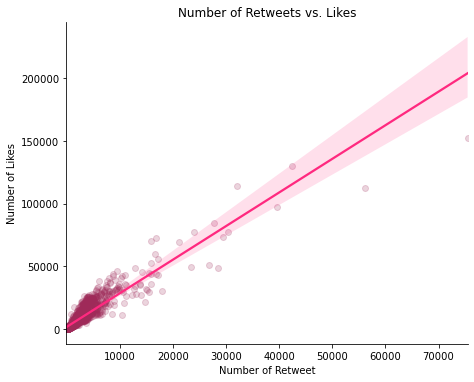

In [12]:
# Plot scatterplot of number of retweets vs. likes
colors = ["#ff297f"]
sns.set_palette(sns.color_palette(colors))
sns.lmplot(x="number_of_retweets", 
           y="number_of_likes", 
           data=twitter_archive_master,
           height = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5, "color": "#9f2a59"})
plt.title('Number of Retweets vs. Likes')
plt.xlabel('Number of Retweet')
plt.ylabel('Number of Likes')

The plot above shows that there is one retweet for every four likes. The majority of the data lies below forty-thousand likes and ten-thousand retweets, and as we can see, the number of retweets and likes are correlated positively.

## How many dog breeds the algorithm was able to predict? 

In [13]:
print('The algorithm was able to predict {} dog breeds and failed to do so in {} cases.'.format(twitter_archive_master['breed_prediction'].value_counts().sum(), (twitter_archive_master['breed_prediction'].isnull().sum())))

The algorithm was able to predict 1620 dog breeds and failed to do so in 300 cases.


## How does each variable correlates with the other?

Text(0.5, 1.0, 'Variables Correlation')

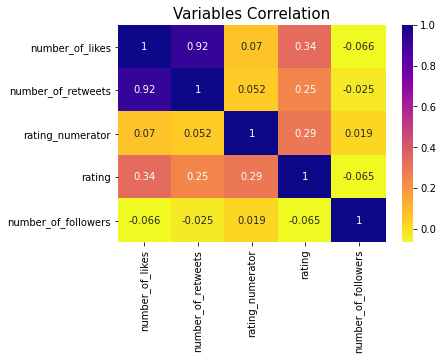

In [101]:
sns.heatmap(twitter_archive_master[['number_of_likes','number_of_retweets','rating_numerator', 'rating', 'number_of_followers']].corr(), cmap="plasma_r", annot=True)
plt.title('Variables Correlation', size=15)

The strongest obvious correlation is between likes and retweets, which is of 0.92. While there is a negative weak correlation of -0.025 between the retweets and the followers. Also, it is normal for rating to correlates with the rating numerator, since the latter actually has been used to calculate it.

## Where do the majority of the numerators lies?

Text(0.5, 1.0, 'Distribution Of The Rating Numerator')

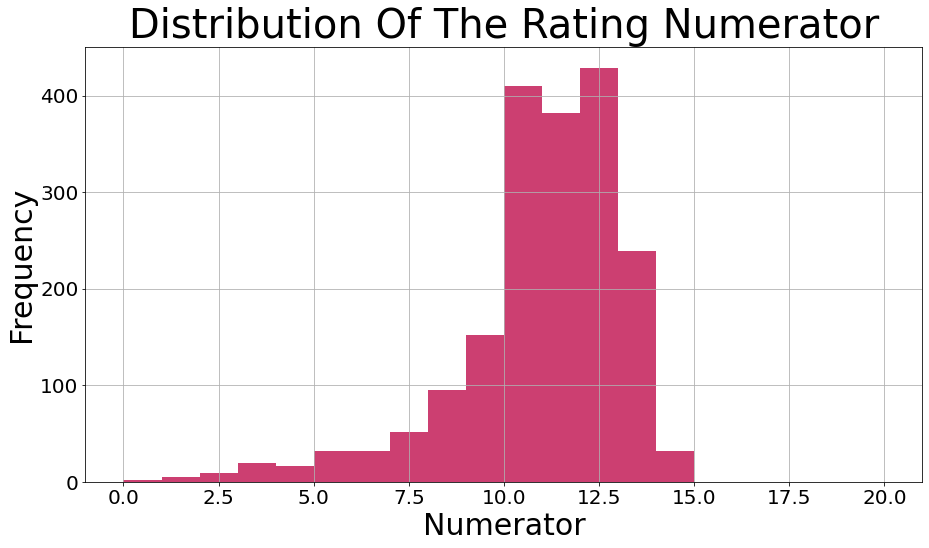

In [82]:
color1=['#cc3f71']
twitter_archive_master.hist(column='rating_numerator', bins = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], color=color1, figsize=(15,8))
plt.xlabel('Numerator', size=30)
plt.xticks(fontsize=20)
plt.ylabel('Frequency', size=30)
plt.yticks(fontsize=20)
plt.title('Distribution Of The Rating Numerator', size=40)

As the plot shows, the majority of the numerators lies between 10 and 13.

## What is the most common dog stage? 

In [70]:
twitter_archive_master['dog_stages'].value_counts()

None       1625
pupper      206
doggo        59
puppo        22
floofer       8
Name: dog_stages, dtype: int64

In [80]:
# extracting the data without the None
Dog_Stages= twitter_archive_master['dog_stages'][twitter_archive_master['dog_stages'].values!='None']

In [69]:
Dog_Stages.value_counts()

pupper     206
doggo       59
puppo       22
floofer      8
Name: dog_stages, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'doggo'),
  Text(1, 0, 'floofer'),
  Text(2, 0, 'pupper'),
  Text(3, 0, 'puppo')])

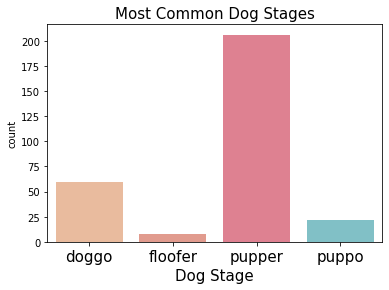

In [85]:
color2 = ["#f5b892","#ef9280","#ed7287","#75c9d2"]
sns.set_palette(sns.color_palette(color2))
color=sns.countplot(data=Dog_Stages, x=Dog_Stages)
plt.title('Most Common Dog Stages', size=15)
plt.xlabel('Dog Stage',size=15)
plt.xticks(fontsize=15)

As it shown above, pupper is the most common dog stage as it appeared 206 times in the dataset. Next comes doggo, which appeared 59 times.

## Which dog stage received the highest likes and retweets?

In [14]:
# retweet and favorite count depending on the dog stage
print('The mean of the number of retweets and likes for the doggo stage is {} and {} respectively.'.format((round(twitter_archive_master.number_of_retweets[twitter_archive_master.dog_stages == 'doggo'].mean())), (round(twitter_archive_master.number_of_likes[twitter_archive_master.dog_stages == 'doggo'].mean()))))
print('While the mean of the number of retweets and likes for the floofer stage is {} and {} respectively.'.format((round(twitter_archive_master.number_of_retweets[twitter_archive_master.dog_stages == 'floofer'].mean())), (round(twitter_archive_master.number_of_likes[twitter_archive_master.dog_stages == 'floofer'].mean()))))
print('On the otherhand, the mean of the number of retweets and likes for the puppo stage is {} and {} respectively.'.format((round(twitter_archive_master.number_of_retweets[twitter_archive_master.dog_stages == 'puppo'].mean())), (round(twitter_archive_master.number_of_likes[twitter_archive_master.dog_stages == 'puppo'].mean()))))
print('Finally, the mean of the number of retweets and likes for the doggo stage is {} and {} respectively.'.format((round(twitter_archive_master.number_of_retweets[twitter_archive_master.dog_stages == 'pupper'].mean())), (round(twitter_archive_master.number_of_likes[twitter_archive_master.dog_stages == 'pupper'].mean()))))

The mean of the number of retweets and likes for the doggo stage is 5650 and 16817 respectively.
While the mean of the number of retweets and likes for the floofer stage is 4066 and 12251 respectively.
On the otherhand, the mean of the number of retweets and likes for the puppo stage is 6215 and 21723 respectively.
Finally, the mean of the number of retweets and likes for the doggo stage is 1912 and 6235 respectively.


(0.0, 20000.0)

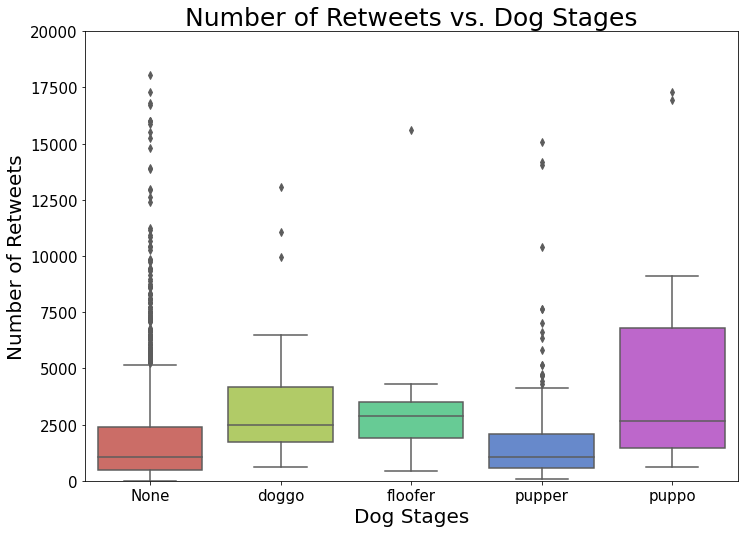

In [91]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.boxplot(x='dog_stages', y='number_of_retweets', data=twitter_archive_master,palette='hls', ax=ax)
plt.title('Number of Retweets vs. Dog Stages', size=25)
plt.xlabel('Dog Stages',size=20)
plt.ylabel('Number of Retweets',size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0,20000)

(0.0, 50000.0)

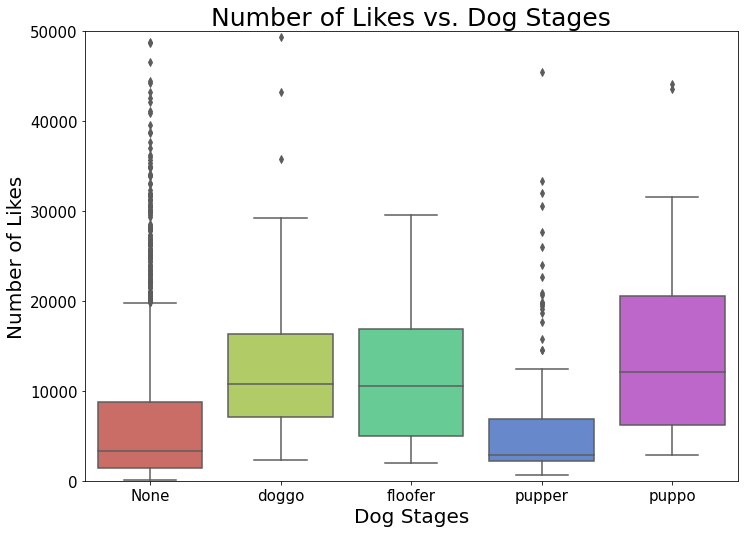

In [92]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.boxplot(x='dog_stages', y='number_of_likes', data=twitter_archive_master,palette='hls', ax=ax)
plt.title('Number of Likes vs. Dog Stages', size=25)
plt.xlabel('Dog Stages',size=20)
plt.ylabel('Number of Likes',size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0,50000)

As it shown above, the dog stages with the highest number of retweets are puppo then floofer. While the puppo then doggo received the higher likes. Over all, pupper is the least in both number of likes and retweets.

## What is the most common dog breeds the algorithm predicted, and how confident was it? 



In [50]:
twitter_archive_master['breed_prediction'].value_counts()[0:5]

Golden Retriever      143
Labrador Retriever    101
Pembroke               94
Chihuahua              87
Pug                    60
Name: breed_prediction, dtype: int64

Text(0, 0.5, 'Number of Breeds Predictions')

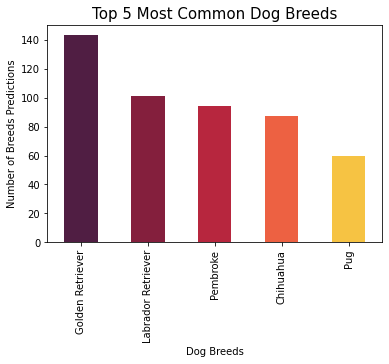

In [94]:
color3=['#501e43', '#841f3d', '#b7263e', '#ed6142', '#f6c343']
twitter_archive_master['breed_prediction'].value_counts()[0:5].sort_values(ascending=False).plot(kind = 'bar', color = color3)
plt.title('Top 5 Most Common Dog Breeds', size=15)
plt.xlabel('Dog Breeds')
plt.ylabel('Number of Breeds Predictions')

In [60]:
# The Confidence:
common_breeds= twitter_archive_master['breed_prediction'].value_counts()[0:5].index.tolist()
common_breeds

['Golden Retriever', 'Labrador Retriever', 'Pembroke', 'Chihuahua', 'Pug']

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

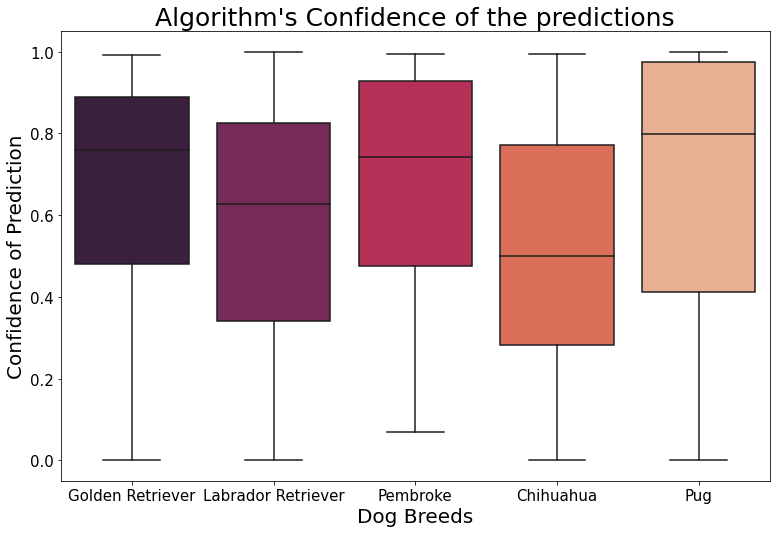

In [100]:
only_common_breeds= twitter_archive_master[twitter_archive_master['breed_prediction'].isin(common_breeds)]
fig, ax = plt.subplots()
fig.set_size_inches(12.7, 8.27)
sns.boxplot(x='breed_prediction', y='prediction_confidence', data=only_common_breeds, order=common_breeds, palette="rocket", ax=ax)
plt.title('Algorithm\'s Confidence of the predictions', size=25)
plt.xlabel('Dog Breeds',size=20)
plt.ylabel('Confidence of Prediction',size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

The top five most common dog breeds are Golden Retriever, Labrador Retriever, Pembroke, Chihuahua and Pug. Obviously, the conference of predicting each of these dogs varies from one to the other. The algorithm was almost sure of predicting the dog breed for some dogs, while in some cases it was pretty unsure; such as The Chihuahua, where its median confidence was about 50%.

<a id='con'></a>
<br><br><br>
## Conclusion 
The Twitter account @dog_rates is focused on rating and commenting humorously on pictures of dogs, hence the likes, retweets and ratings do not completely depend on the picture of the dogs since the humor affects the followers decision as well.<br>
We believe we did a great job at this project, form gathering data to assessing it and cleaning it and then analyzing it. There were some problems though, for example, the missing tweet_ids that we couldn't scrape their data from Twitter. Also, the dataset definitely needs further cleaning and assessment.

<a id='ref'></a>
<br><br>
## References
- https://stackoverflow.com/questions/29902714/print-the-complete-string-of-a-pandas-dataframe
- https://stackoverflow.com/questions/45184549/python-pandas-new-columns-value-if-the-item-is-in-the-list
- https://stackoverflow.com/questions/47408527/seaborn-countplot-display-only-n-most-frequent-categories
- https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot
- https://seaborn.pydata.org/tutorial/color_palettes.html
- https://cmdlinetips.com/2018/11/how-to-assign-specific-colors-to-boxplots-in-seaborn/